<h1>Module 0: Astrophysics and Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy 
import pandas as pd

<h1> Reading and displaying data

<ul>
<li>Display the time series with the corresponding errors.</li>
<li>Use the subplot function with the figsize parameter to create your plots. Don't forget legends and set the limits properly.</li>
</ul>






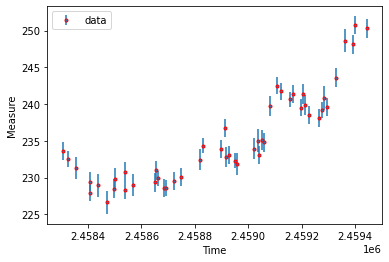

In [2]:
data = pd.read_csv("dataFile.csv")
time=data.loc[:,"t"]
msr=data.loc[:,"y"]
error=data.loc[:,"ey"]


#plt.scatter(time,msr)
plt.errorbar(time,msr, error,mec='red',fmt='.')
plt.ylabel("Measure")
plt.xlabel("Time")
plt.legend(['data', 'error'])

<h1> Part 1.2 - Modeling the data and model comparison

<ul>
<li>Model the data with a Polynomial in time of degree n : $f(t_i|a)=\sum_{k=0}^{n} a_k \left(\frac{t_i - t_{ref}}{365.25}\right)^k$ where   $t_{ref}=\frac{t_{min}+t_{max}}{2}$ is a reference epoch and return the $\chi^{2}$, the $\textbf{BIC}$, the values of the adjusted parameters, their standard deviation as well as the correlation matrix.</li>

    
<li>Model the data with polynomials of degree 0, 1, 2, 3 and 4. </li>
    <li>For each model, list the different outputs</li>
    <li>Describe the correlation matrix and compare the models using the ΔBIC</li>
    <li>Choose the model that explain the best the observed data. Explain</li>
    
    
</ul>

In [3]:
tref=(np.min(time)+np.max(time))/2

def Aij(t,tref,error,dim):
    design=np.zeros((len(t),dim+1))
    for i in range (0,len(t)):
        for j in range (0,dim+1):
            design[i,j]=(((t[i]-tref)/365.25)**j)/error[i]
    return design   



def model(t, t_ref, n):
    design_matrix = np.zeros((len(data), n+1))
    for j in range(n+1):
        design_matrix[:,j]=(((t-t_ref)/365.25)**j)
    return design_matrix



In [15]:
bi=np.array(msr/error)
n_dim=4
list_chi=[]
bic_p=[]


for n in range(0, n_dim+1):
    
    A=Aij(time,tref,error,n)
    X=model(time,tref,n)
    
    
    alpha=(A.T).dot(A)
    beta=(A.T).dot(bi)

    
    cov_matrix=np.linalg.solve(alpha, np.identity(len(alpha)))
    
    std_param= np.array([np.diagonal(cov_matrix)**(1/2)])
    corr_matrix= (cov_matrix/((std_param.T).dot(std_param)))
    a=(cov_matrix).dot(beta)
    
    
    model_fit = X.dot(a)
    chi2=np.sum((bi - model_fit/error)**2)
    list_chi.append(chi2)
    
    BIC=chi2 +(n+1)*np.log(len(data))
    bic_p.append(BIC)
    


    print("Covariance matrix "+str(n)+":")
    print(cov_matrix)
    print("Chi2 for polynomial number "+str(n)+":"+str(chi2))
    print("BIC for polynomial number "+str(n)+":"+str(BIC))
    print("Parameters for polynomial number "+str(n)+":"+str(a))
    print("Standard deviation of parameters for polynomial number "+str(n)+":"+str(std_param))
    print("Correlation matrix for polynomial number "+str(n)+":")
    print(corr_matrix)
    print("----------------------------------------------------------------------------------------")
    print()
  
    
    
   

Covariance matrix 0:
[[0.03126398]]
Chi2 for polynomial number 0:1186.3719835551256
BIC for polynomial number 0:1190.2840065605537
Parameters for polynomial number 0:[235.36548573]
Standard deviation of parameters for polynomial number 0:[[0.17681622]]
Correlation matrix for polynomial number 0:
[[1.]]
----------------------------------------------------------------------------------------

Covariance matrix 1:
[[ 0.03150875 -0.00309989]
 [-0.00309989  0.03925769]]
Chi2 for polynomial number 1:324.445603248924
BIC for polynomial number 1:332.2696492597803
Parameters for polynomial number 1:[234.90616124   5.81697871]
Standard deviation of parameters for polynomial number 1:[[0.17750705 0.19813554]]
Correlation matrix for polynomial number 1:
[[ 1.         -0.08813916]
 [-0.08813916  1.        ]]
----------------------------------------------------------------------------------------

Covariance matrix 2:
[[ 0.07088498 -0.00487452 -0.04888543]
 [-0.00487452  0.03933767  0.00220319]
 [-0

The correlation matrix allows us to identify how related the variables of the problem are. It's values are defined from 0 to 1, with 1 being the highest correlation and 0 being a null correlation. That is why a well-designed matrix must have 1 on the diagonal and it must be symmetric, because a varible will be 100$%$ correlated with itself.

The BIC coefficient is designed from the $\chi^{2}$ calculation. The following formula was taken for its implementation:
$$BIC=kln(n)$$

where k is the number of model parameters in the test.

In this way, the most suitable BIC to choose the fit is that of the polynomial of degree number 2, since its parameters are the best correlated, because although it is true that the BIC of the polynomial of degree 4 has a lower value, it is preceded by a higher BIC. That is why it was decided to take the BIC d = 2



<h1> Data Visualization

<ul>
On the top panel:
    
    
    
   
<li>Display the time series with the corresponding errors.</li>
    
<li>Overplot the model computed on a linear grid (in time)</li>

On the bottom panel: 

<li>Display the residuals (data-model) vs. time with error bars.</li>
    
  
</ul>

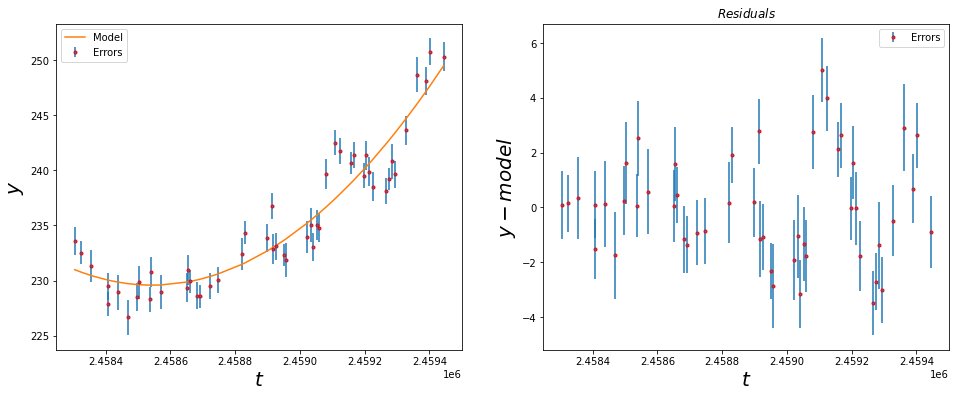

In [26]:
A2=Aij(time,tref,error,2)
X2=model(time,tref,2)
alpha2=(A2.T).dot(A2)
beta2=(A2.T).dot(bi)
cov_matrix2=np.linalg.solve(alpha2, np.identity(len(alpha2)))
std_param2= np.array([np.diagonal(cov_matrix2)**(1/2)])
corr_matrix2= (cov_matrix2/((std_param2.T).dot(std_param2)))
a2=(cov_matrix2).dot(beta2)
model_fit2= X2.dot(a2)
    
    
    
fig,ax = plt.subplots(1,2, figsize=(16,6))

ax[0].errorbar(time,msr, error, fmt='.',mec='red',label="Errors")
ax[0].plot(time,model_fit2,label="Model")
ax[0].set_xlabel(r"$t$", fontsize=20)
ax[0].set_ylabel(r"$y$", fontsize=20)
ax[0].legend()


residuals=msr-model_fit

ax[1].errorbar(time,residuals, error, fmt='.',mec='red',label="Errors")
ax[1].set_xlabel(r"$t$", fontsize=20)
ax[1].set_title(r"$Residuals$")
ax[1].set_ylabel(r"$y-model$", fontsize=20)
ax[1].legend()


<h1>Part 1.4 - Bonus - Impact of reference epoch on data modeling

<ul>
Assess the impact of a change of reference epoch tref on the $\chi^{2}$, the estimate of the model parameter, their standard deviation and correlations. To do so, perform the analysis with $t_{ref}=t_{min}$, $t_{ref}=t_{max}$ and $t_{ref}=2t_{min}-t_{max}$   

  
</ul>

In [17]:
impact=(np.min(time),np.max(time),(2*np.min(time))-(np.max(time)))
impact

(2458304.73792, 2459444.072015, 2457165.4038250004)

Parameters for polynomial number 0, with t_ref equals to:2458304.73792
[235.36548573]
Standard deviation of parameters for polynomial number 0:[[0.17681622]]
Correlation matrix for polynomial number 0:
[[1.]]
-------------------------------------------------------------------------------------------------


Parameters for polynomial number 1, with t_ref equals to:2458304.73792
[225.8336326    5.81697871]
Standard deviation of parameters for polynomial number 1:[[0.36969532 0.19813554]]
Correlation matrix for polynomial number 1:
[[ 1.         -0.87820984]
 [-0.87820984  1.        ]]
-------------------------------------------------------------------------------------------------


Parameters for polynomial number 2, with t_ref equals to:2458304.73792
[230.981273    -4.28858961   3.2778094 ]
Standard deviation of parameters for polynomial number 2:[[0.53512433 0.78493872 0.24635555]]
Correlation matrix for polynomial number 2:
[[ 1.         -0.85272644  0.72298977]
 [-0.85272644  1.    

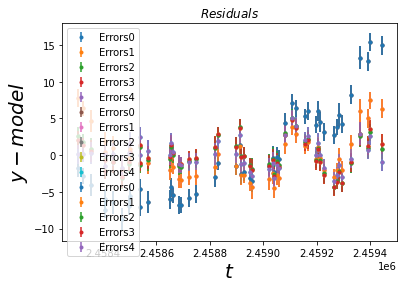

In [18]:
for k in impact:
    for n in range(0, n_dim+1):
    
        Amin=Aij(time,k,error,n)
        Xmin=model(time,k,n)


        alphamin=(Amin.T).dot(Amin)
        betamin=(Amin.T).dot(bi)


        cov_matrixmin=np.linalg.solve(alphamin, np.identity(len(alphamin)))

        std_paramin=np.array([np.diagonal(cov_matrixmin)**(1/2)])
        corr_matrixmin= (cov_matrixmin/((std_paramin.T).dot(std_paramin)))  
    
        amin=(cov_matrixmin).dot(betamin)

        print("Parameters for polynomial number "+str(n)+", with t_ref equals to:"+str(k))
        print(amin)
        print("Standard deviation of parameters for polynomial number "+str(n)+":"+str(std_paramin))
        print("Correlation matrix for polynomial number "+str(n)+":")
        print(corr_matrixmin)
        
        model_fit_min = Xmin.dot(amin)
        residualsmin=msr-model_fit_min
   

        plt.errorbar(time,residualsmin, error,fmt='.',label="Errors"+str(n) )
        plt.xlabel(r"$t$", fontsize=20)
        plt.title(r"$Residuals$")
        plt.ylabel(r"$y-model$", fontsize=20)
        plt.legend()
        
        print("-------------------------------------------------------------------------------------------------")
        print()
        print()

  

<h1>Part 2.1 - Periodogram

<ul>
<li>For each frequecy $\nu_{j}$, you will adjust the model to the data and store the corresponding $\chi^{2}$, $a_{n+1}$ and $a_{n+2}$ values in 3 arrays of size $N_{f}$.</li>
  
</ul>

In [19]:
def Aij2(t,tref,error,n,freq):
    design=np.zeros((len(t),n+3))
    for i in range (0,len(t)):
        for j in range (0,n+1):
            design[i,j]=(((t[i]-tref)/365.25)**j)/error[i]
        design[i,n+1]=np.cos(2*np.pi*v*(t[i]-tref))/error[i]
        design[i,n+2]=(np.sin(2*np.pi*v*(t[i]-tref)))/error[i]
    return design  





def model2(t, t_ref, dim,freq):
    model = np.zeros((len(data), dim+3))
    for j in range(n):
        model[:,j]=(((t-tref)/365.25)**j) 
        model[:,dim+1]=(np.cos(2*np.pi*v*(t-tref)))
        model[:,dim+2]=(np.sin(2*np.pi*v*(t-tref)))
    return model



In [20]:
deltaT=np.max(time)-np.min(time)
chisq2=np.empty(5000)
an1=np.empty(5000)
an2=np.empty(5000)
biccs=np.empty(5000)
freq=np.empty(5000)

n_dim2=5000


for j in range(1, n_dim2+1):
    
    v=(j/deltaT)/5
    
    A2=Aij2(time,tref,error,2,v)
    
    X2=model2(time,tref,2,v)
   

    alpha2=(A2.T).dot(A2)
    beta2=(A2.T).dot(bi)
    cov_matrix2=np.linalg.inv(alpha2)
    std_param2=(np.diagonal(cov_matrix2))**(1/2)
    corr_matrix2= (cov_matrix2/((std_param2.T).dot(std_param2)))
    
    a2=(cov_matrix2).dot(beta2)




    model_fit2= X2.dot(a2)
    chi2_2=np.sum((bi - model_fit2/error)**2)
    #print(np.shape(a2))
    chisq2[j-1]=chi2_2
    an1[j-1]=a2[3]
    an2[j-1]=a2[4]
    
    
    BIC2=chi2_2 +(n+3)*np.log(len(time))
    biccs[j-1]=BIC2
    freq[j-1]=v

 
    

<h1>Part 2.2 Periodogram as model comparison

<ul>
    
$$p_{j}=p(\nu_{j})=\frac{(\chi^{2})_{cs+p}(\nu_{j})-(\chi^{2}_{p})}{(\chi^{2}_{p})}$$    
<li>Explain the formulae, ie. What does the difference and the ratio of χ2 represent ?</li>
<li>Create a programme that computes the periodogram defined above</li>
<li>Create a programme that computes the periodogram based on the ΔBIC such that : $p_{j}=BIC_{cs}(\nu_{j})-BIC_{p}$</li>
<li>Estimate the significance of the periodogram dominant peak. </li>
  
</ul>

<ul>
    
Explanation: The periogram is composed of the radius between the difference of the chi squares in a polynomial fit that includes sinuoidal terms and that includes the frequencies in which the best fit is being sought and a chi square of a unique polynomial fit. So the periodorgram looks for the frequency that best fits in both spaces.
  
</ul>

In [21]:
xp=list_chi[2]

p=(chisq2-xp)/xp
print(len(p))

5000


In [22]:
bicpp=bic_p[2]
PJ=biccs-bicpp
print(np.min(biccs))


69.80836088251598


In [23]:
significance=2*np.log(1/150)
significance   

-10.021270588192511

<h1>Part 2.3 - Data Visualisation

<ul>
    
<li>Display both periodograms as a function of the frequency (linear scale) and period (log scale). Represent several bic thresholds as horizontal lines to visualise the significance of the periodogram peaks.</li>
</ul>

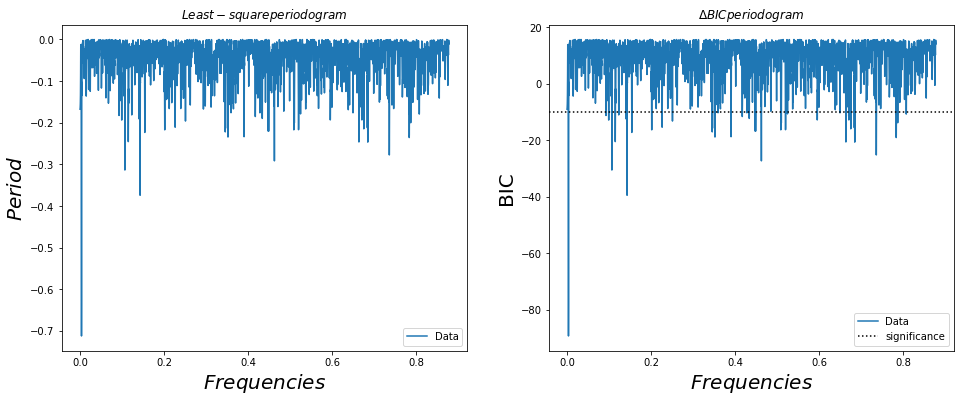

In [24]:
fig,ax = plt.subplots(1,2, figsize=(16,6))

ax[0].plot(freq,p,label="Data")
ax[0].set_xlabel(r"$Frequencies$", fontsize=20)
ax[0].set_ylabel(r"$Period$", fontsize=20)
ax[0].set_title(r"$Least-square periodogram$")
ax[0].legend()


ax[1].plot(freq,PJ,label="Data")
ax[1].axhline(significance,color='black', linestyle=':',label="significance")
ax[1].set_xlabel(r"$Frequencies$", fontsize=20)
ax[1].set_ylabel(r"BIC", fontsize=20)
ax[1].set_title(r"$\Delta BIC periodogram$")
ax[1].legend()



No handles with labels found to put in legend.


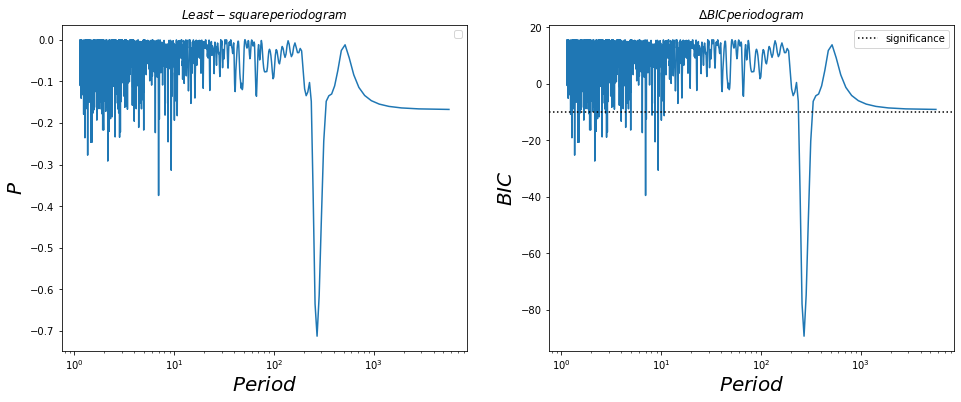

In [25]:
fig,ax = plt.subplots(1,2, figsize=(16,6))

ax[0].plot(1/freq,p)
ax[0].semilogx()
ax[0].set_xlabel(r"$Period$", fontsize=20)
ax[0].set_ylabel(r"$P$", fontsize=20)
ax[0].set_title(r"$Least-square periodogram$")
ax[0].legend()


ax[1].plot(1/freq,PJ)
ax[1].axhline(significance,color='black', linestyle=':',label="significance")
ax[1].semilogx()
ax[1].set_xlabel(r"$Period$", fontsize=20)
ax[1].set_ylabel(r"$BIC$", fontsize=20)
ax[1].set_title(r"$\Delta BIC periodogram$")
ax[1].legend()
